# Project Linear Regression: Boston House Price Prediction

**Marks: 30**

Dear Learner,

Welcome to project on Linear Regression. We will use the Boston house price data for the exercise.
Do read the problem statement and the guidelines around the same.

---
### Problem Statement
---------------------------
The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
### Data Information
---------------------------
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.

-------
### Tools
-----------
- We will use sklearn and statsmodel for this exercise


---------------------------
## Guidelines
-----------------------------------------
- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed. 
- The marks of each requirement is mentioned in the question.
- You can raise your issues on the discussion forum on the Olympus.
- You can use Jupyter Notebook/ Google Colab(recommended) for this assessment.
- Uncomment the code snippets and work on them
--------------------------------------------
Wishing you all the best!

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


###Load the dataset

In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [3]:
df.shape

(506, 13)

**Get the info data types column wise**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### 1. Check missing values(1 marks)

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### 2. Figure out the statistical Summary of all the numerical columns. Mention all the columns that present a significant skew by looking at the summary. (3 marks)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Insights:**

-Crim :median = 0.256510 <  mean = 3.613524 -> significantly right skewed 
-Zn:  median = 0.000000	 <  mean = 11.363636 ->  significantly right skewed 
-Indus : alittle right skewed but not significant
-CHAS : only 0 -1 more 0 than 1  
-Nox: alittle diffrence between mean and median and base on the data range it shows a little right skewed but not significant at all 
-Age: mean = 68.574901 <  median = 77.500000 ,min = 2.900000-> significantly left skewed 
-Dis : shows a little skewness to the right 
-Rad : shows a little skewness to the right 
-Tax : shows a little skewness to the right 
-PTRATIO: shows a little skewness to the left
-LSTAT:	shows a little skewness to the right
-MEDV:shows a little skewness to the right

### 3. Visualising the features at hand - (2 marks)

- Construct a pairplot for all the features using 'kde' type for the diagonal.
- Provide insights from the plots (1 marks)

In [7]:
#pairplot
#sns.pairplot(df ,diag_kind = 'kde')
#it gave error 

In [8]:
#sns.pairplot(df)
#tried to check

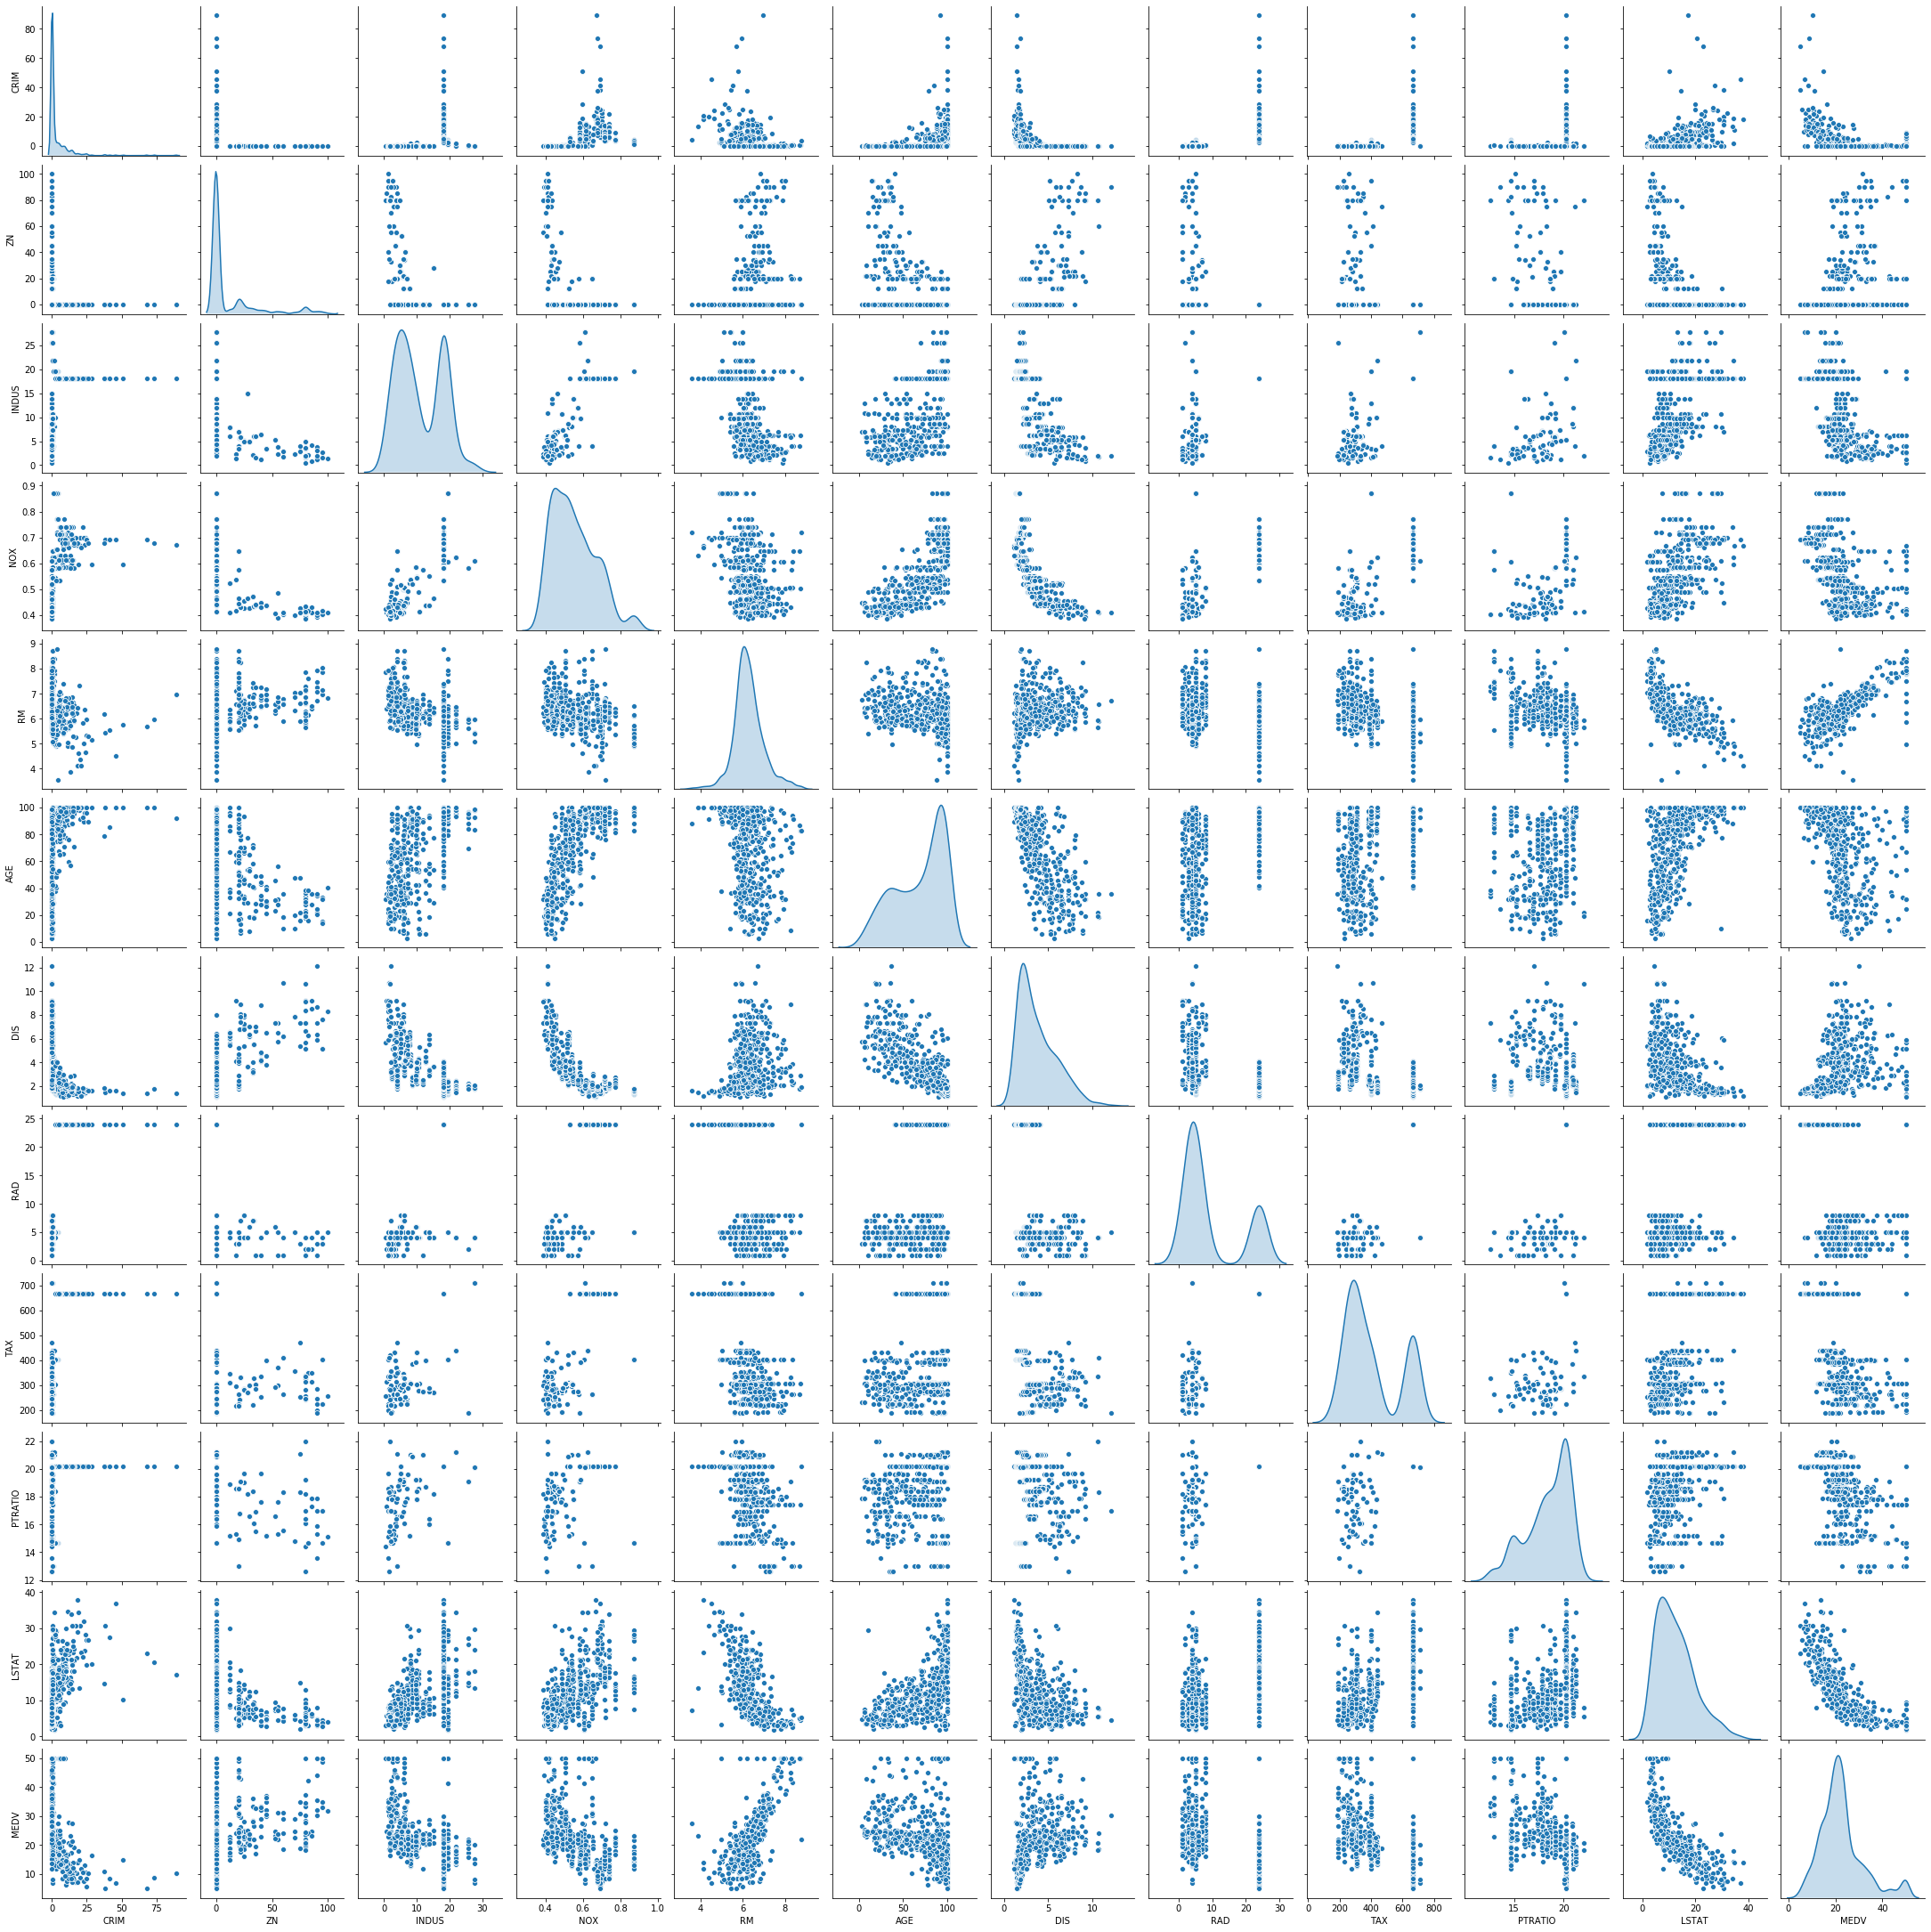

In [9]:
sns.pairplot(df.drop(columns= 'CHAS') ,diag_kind = 'kde')

**Insights -**


column'CHAS' only has  0 and one and will give an error so I droped it to use 'kde' type for the diagona
CRIM :right skew
ZN: right skew	
INDUS : has two mode 	
CHAS:only 0 - 1  
NOX:right skewed	
RM: normal 
AGE:extra little peak , left skewed
DIS:right skewed
RAD:has two peak can devided to two sub group with normal distribution	
TAX:has two peak can devided to two sub group with normal distribution 
PTRATIO:left skewed
LSTAT: right skewed 	

### 4. Get the Correlation Heatmap and highlight correlation values as asked below.(5 Marks)
- Draw the correlation plot with cmap = 'Oranges' - (2 marks)
- Highlight all the correlations above 0.7 (2 marks)
- Observe the correlation value between DIS and NOX and comment on the same. (1 mark)



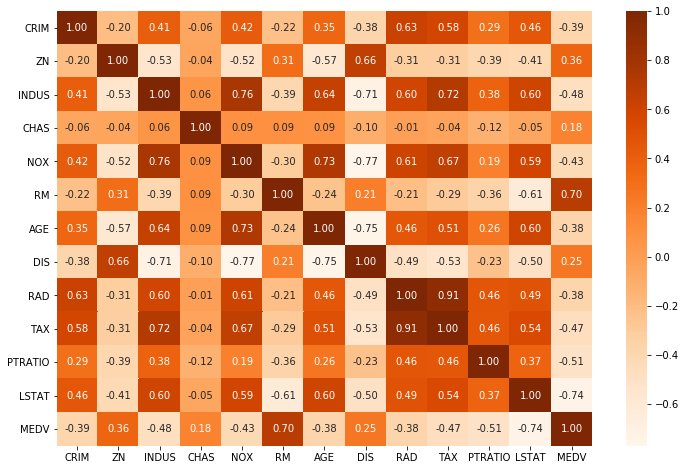

In [10]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Oranges' )
plt.show()

**Comments**

Positive Correlations:
INDUS ~ NOX corr = 0.76
INDUS ~ TAX corr = 0.72
NOX ~ AGE corr = 0.73
RM ~ MEDV corr = 0.7
RAD ~ TAX corr = 0.91 
Negative Correlations:
INDUS ~ DIS corr = -0.71
NOX ~ DIS corr = -0.77
AGE ~ DIS Corr = -0.75
LSTAT ~ MEDV CORR= -0.74


NOX ~ DIS corr = -0.77 : NEGETIVE CORRELATION 
    AS NOX levels increase , DIS decreases 

### 5.  Split the dataset (2 marks)
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [11]:
Y = df['MEDV']
X = df.drop(columns = {'MEDV'})

In [12]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 ,train_size = 0.7, random_state=1)

### 6. Scale the features (2 marks)
- Train the scaler on the train data and use it to transfrom the train and the test data.




In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

X_test = ss.transform(X_test)

X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

### 7. Modelling (15 Marks)

#### 7.1 With all the features (2 marks)

- Use all the features and report the mean of mean_squared_error for the 5 fold validation set. (2 marks)




In [14]:
# Intialise the model and fit the model on the train data
# Let us use the Kfold cross validation with k = 5

from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr_cv_scores_mse = cross_val_score(lr,X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print()
print(" Average MeanSquared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-32.62206545 -18.74589693 -27.88080966 -29.08994197 -22.17862333]

 Average MeanSquared Error: 26.103 (+/- 9.964)


#### 7.2 Use vif scores to iteratively remove the features with vif values > 5 and report the cross validation Average Mean_Squared_Error at each iteration. (5 marks) 

- Drop the features in an iterative fashion for features With  VIF scores > 5
- Run cross validation with 5 fold to report the average mean_squared_error 

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

CRIM        1.924114
ZN          2.743574
INDUS       3.999538
CHAS        1.076564
NOX         4.396157
RM          1.860950
AGE         3.150170
DIS         4.355469
RAD         8.345247
TAX        10.191941
PTRATIO     1.943409
LSTAT       2.861881
dtype: float64



**Lets drop the feature TAX**

In [16]:
# Drop the feature and report the average mean_squared_Error metric with Kfold cross validation, k = 5

X_train2 = X_train.drop(columns = ['TAX'])

lr = LinearRegression()

lr_cv_scores_mse = cross_val_score(lr, X_train2, y_train, cv = 5, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print()
print(" Average MeanSquared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-33.09895729 -19.12335267 -28.55114912 -29.41833681 -22.53167693]

 Average MeanSquared Error: 26.545 (+/- 10.057)


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)

print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

CRIM       1.923159
ZN         2.483399
INDUS      3.270983
CHAS       1.050708
NOX        4.361847
RM         1.857918
AGE        3.149005
DIS        4.333734
RAD        2.942862
PTRATIO    1.909750
LSTAT      2.860251
dtype: float64



**All vif scores under 5**

#### 7.3 Use the best model out of all the ones tried before(based on the least average mean_squared error on the validation set obtained through cross_val_Score)and report the test data metrics (2 marks)

- Fit the model for the training data all over again
- Save the test predictions from the model
- Print the train and the test Rsquared

In [18]:
# Using the X_train as it has the least average MSE value

X_test = X_test[X_train.columns]

lr = LinearRegression()

lr.fit(X_train,y_train)
test_pred = lr.predict(X_test)

print("Train R squared:", lr.score(X_train, y_train))
print("Test R squared:", lr.score(X_test, y_test))

Train R squared: 0.7073732058856178
Test R squared: 0.772168489913416


#### 7.4 Write a function that takes the prediction and the actuals as numpy arrays and returns the RMSE. (3 marks)

- Print the RMSE for the train and the test set using the function RMSE

In [19]:
# def RMSE(actual, prediction):
  #Your Code here. Return the RMSE#
from sklearn.metrics import mean_squared_error

def RMSE(actual, prediction):
    return np.sqrt(mean_squared_error(actual,prediction))
  


In [20]:
testRMSE= RMSE(y_test,lr.predict(X_test))

trainRMSE = RMSE(y_train,lr.predict(X_train))


In [21]:
testRMSE, trainRMSE

(4.5696586527458, 4.874227661429436)

#### 7.5 Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. (3 marks)

In [22]:
a = lr.coef_
coeff_data = pd.DataFrame()

coeff_data['Coefs'] = a 
coeff_data['Feature'] = X_train.columns

coeff_data

,Coefs,Feature
0,-0.969104,CRIM
1,1.437475,ZN
2,0.370610,INDUS
3,0.701135,CHAS
4,-2.622148,NOX
5,1.866446,RM
6,0.136517,AGE
7,-3.274621,DIS
8,2.626639,RAD
9,-1.940001,TAX


In [23]:
intercept = {'Coefs' : lr.intercept_ }
coeff_data = coeff_data.append(intercept, ignore_index=True)
coeff_data

,Coefs,Feature
0,-0.969104,CRIM
1,1.437475,ZN
2,0.370610,INDUS
3,0.701135,CHAS
4,-2.622148,NOX
5,1.866446,RM
6,0.136517,AGE
7,-3.274621,DIS
8,2.626639,RAD
9,-1.940001,TAX


In [24]:
# Let us write the equation of the fit
Equation = "Price ="
print(Equation, end='\t')
for i in range(0, 13):
    if(i!=12):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

Price =	( -0.9691041779394559 ) * CRIM +  ( 1.4374751085628352 ) * ZN +  ( 0.37061006699438026 ) * INDUS +  ( 0.7011346214239947 ) * CHAS +  ( -2.622147525842737 ) * NOX +  ( 1.8664458062800238 ) * RM +  ( 0.13651655309868496 ) * AGE +  ( -3.2746207827625136 ) * DIS +  ( 2.626638511065884 ) * RAD +  ( -1.940001225241942 ) * TAX +  ( -2.120298107079978 ) * PTRATIO +  ( -4.2600571415145705 ) * LSTAT +  22.339830508474577
